In [11]:
!pip uninstall torch -y
!pip uninstall torch.nn -y
!pip uninstall torch.optim -y
!pip install torch torchvision torchaudio

  Using cached torch-2.7.0-cp312-cp312-win_amd64.whl.metadata (29 kB)
  Using cached torchaudio-2.7.0-cp312-cp312-win_amd64.whl.metadata (6.7 kB)
Using cached torch-2.7.0-cp312-cp312-win_amd64.whl (212.5 MB)
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.5 MB 1.7 MB/s eta 0:00:02
   ------------ --------------------------- 0.8/2.5 MB 1.6 MB/s eta 0:00:02
   --------------------- ------------------ 1.3/2.5 MB 1.7 MB/s eta 0:00:01
   ----------------------------- ---------- 1.8/2.5 MB 1.9 MB/s eta 0:00:01
   ------------------------------------- -- 2.4/2.5 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 1.9 MB/s eta 0:00:00


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!pip list

Package                   Version
------------------------- ----------------
anyio                     4.6.0
appdirs                   1.4.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.9.0
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.1.7
cloudpickle               3.1.1
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
deap                      1.4.3
debugpy                   1.8.5
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.1.0
Farama-Notifications      0.0.4
fastjsonschema            2.20.0
filelock       

In [15]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "N/A")

AttributeError: module 'torch' has no attribute '__version__'

In [2]:
!pip install --upgrade pip
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

  Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\SUJATHA\Desktop\UC Davis\Spring 2025\ReinforcementLearning\Project\Tramission-Matrix\rl-env\Scripts\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://download.pytorch.org/whl/cpu
  Obtaining dependency information for torch from https://download.pytorch.org/whl/cpu/torch-2.7.0%2Bcpu-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://download.pytorch.org/whl/cpu/torchvision-0.22.0%2Bcpu-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for torchaudio from https://download.pytorch.org/whl/cpu/torchaudio-2.7.0%2Bcpu-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for jinja2 from https://download.pytorch.org/whl/Jinja2-3.1.4-py3-none-any.whl.metadata
Discarding https://download.pytorch.org/whl/Jinja2-3.1.4-py3-none-any.whl#sha256=bc5dd2abb727a5319567b7a813e6a2e7318c39f4f487cfe6c89c6f9c7d25197d (from https://download.pytorch.org/whl/cpu/jinja2/): Requested jinja2 from https://download.pytorch.org/whl/Jinja2-3.1.4-py3-none-any.whl#sha256=bc5dd2abb727a5319567b7a813e6a2e7318c39f4f487cfe6c89c6f9c7d25197d (from torch) has inco


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
  Using cached fonttools-4.58.0-cp310-cp310-win_amd64.whl (2.2 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\SUJATHA\\Desktop\\UC Davis\\Spring 2025\\ReinforcementLearning\\Project\\Tramission-Matrix\\rl-env\\Lib\\site-packages\\cycler\\__init__.py'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Total pixels: 4096
Number of blocks: 128
Pixels per block: 32
All ON → Sum of pixels: 4096.0
All OFF → Sum of pixels: 0.0
Only block 0 ON → Sum of pixels: 32.0


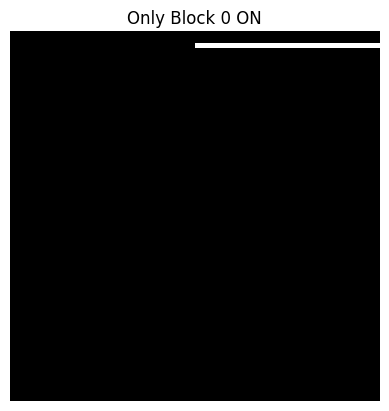

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque
from torch.distributions import Categorical
import copy
from tqdm import tqdm



class WavefrontEnv:
    def __init__(self, slm_dim1=64, slm_dim2=64, eng_size=1,
                 num_pix_per_block=32, alpha=0.3, noise_sigma=0.05):
        # geometry -----------------------------------------------------------
        self.slm_dim1, self.slm_dim2 = slm_dim1, slm_dim2
        self.n_pix   = slm_dim1 * slm_dim2            # 4096
        self.eng_size = eng_size                      # up-sampling factor

        # block grid ---------------------------------------------------------
        self.blocks = self._make_blocks(num_pix_per_block)
        self.num_blocks = len(self.blocks)            # 128 for 32-pix blocks

        # RL bookkeeping -----------------------------------------------------
        self.state_dim    = self.num_blocks + 1       # 128 bits + intensity
        self.action_space = self.num_blocks
        self.alpha  = alpha
        self.sigma  = noise_sigma                     # measurement noise σ

        self.reset()

    # ------------------------------------------------------------------ utils
    def _make_blocks(self, p_per_block):
        """Return list of numpy arrays – each array holds pixel indices of one block."""
        idx = np.arange(self.n_pix)
        return [idx[k : k + p_per_block]
                for k in range(0, self.n_pix, p_per_block)]

    def _blocks_to_pixels(self):
        """Convert block-level mask → 2-D pixel mask (0/1)."""
        pixel = np.zeros(self.n_pix, dtype=np.float32)
        for bid, bit in enumerate(self.block_mask):
            if bit:                                     # block is ON
                pixel[self.blocks[bid]] = 1.0
        return pixel.reshape(self.slm_dim1, self.slm_dim2)

    # ------------------------------------------------------------- RL methods
    def reset(self):
        self.block_mask = np.ones(self.num_blocks, dtype=np.float32)   # all blocks ON
        self.phi        = np.random.rand(self.slm_dim1, self.slm_dim2) # random phase
        self.I_max  = 0.0
        self.I_prev = self._intensity()
        self.I0_mean = self.I_prev
        return self._state()

    def step(self, action: int):
        # flip chosen block bit
        self.block_mask[action] = 1.0 - self.block_mask[action]

        I_t   = self._intensity()
        delta = (I_t - self.I_prev) / self.I0_mean
        bonus = max(0.0, I_t - self.I_max) / self.I0_mean
        reward = delta + self.alpha * bonus - 1e-4      # small time penalty λ

        # bookkeeping
        self.I_prev = I_t
        self.I_max  = max(self.I_max, I_t)

        return self._state(), reward

    # ---------------------------------------------------------------- optics
    def _intensity(self):
        mask2d = self._blocks_to_pixels()
        field  = np.exp(1j * 2 * np.pi * self.phi) * mask2d
        spec   = np.fft.fftshift(np.fft.fft2(field))
        I      = np.abs(spec[self.slm_dim1 // 2, self.slm_dim2 // 2])**2 / spec.size
        I     += self.sigma * np.random.randn()         # additive Gaussian noise
        return float(I)

    # ---------------------------------------------------------------- state
    def _state(self):
        norm_I = self.I_prev / self.I0_mean
        return np.concatenate([self.block_mask, [norm_I]]).astype(np.float32)

# Deep Q-Network
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.out = nn.Linear(256, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.out(x)

# Experience Replay
class ReplayBuffer:
    def __init__(self, capacity=10000):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state):
        self.buffer.append((state, action, reward, next_state))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        state, action, reward, next_state = map(np.array, zip(*batch))
        return (
            torch.FloatTensor(state),
            torch.LongTensor(action),
            torch.FloatTensor(reward),
            torch.FloatTensor(next_state),
        )

    def __len__(self):
        return len(self.buffer)

# Training loop setup
def train_dqn(episodes=1000, max_steps=128, batch_size=64):
    env = WavefrontEnv()
    state_dim = env.num_pixels + 1
    n_actions = env.num_blocks

    policy_net = DQN(state_dim, n_actions)
    target_net = DQN(state_dim, n_actions)
    target_net.load_state_dict(policy_net.state_dict())
    target_net.eval()

    optimizer = optim.Adam(policy_net.parameters(), lr=1e-4)
    buffer = ReplayBuffer()
    gamma = 0.99
    epsilon = 1.0
    epsilon_decay = 0.995
    epsilon_min = 0.05
    update_target_steps = 100
    target_update_counter = 0

    for ep in range(episodes):
        state = env.reset()
        total_reward = 0
        for step in range(max_steps):
            if random.random() < epsilon:
                action = random.randint(0, n_actions - 1)
            else:
                with torch.no_grad():
                    state_tensor = torch.FloatTensor(state).unsqueeze(0)
                    q_values = policy_net(state_tensor)
                    action = q_values.argmax().item()

            next_state, reward, _, _ = env.step(action)
            buffer.push(state, action, reward, next_state)
            state = next_state
            total_reward += reward

            if len(buffer) >= batch_size:
                s_batch, a_batch, r_batch, ns_batch = buffer.sample(batch_size)
                q_vals = policy_net(s_batch).gather(1, a_batch.unsqueeze(1)).squeeze()
                next_q_vals = target_net(ns_batch).max(1)[0]
                target = r_batch + gamma * next_q_vals

                loss = nn.MSELoss()(q_vals, target.detach())
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                target_update_counter += 1
                if target_update_counter % update_target_steps == 0:
                    target_net.load_state_dict(policy_net.state_dict())

        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        print(f"Episode {ep + 1}, Total Reward: {total_reward:.4f}, Epsilon: {epsilon:.3f}")

# You can run train_dqn() locally to train the agent
# train_dqn()



# --------------------------------------------------------------------------- #
# 2. Actor-Critic network                                                     #
# --------------------------------------------------------------------------- #
class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(ActorCritic, self).__init__()
        
        # Common layers
        self.fc_common = nn.Sequential(
            nn.Linear(state_dim, 256),
            nn.ReLU()
        )
        
        # Actor network (policy)
        self.actor_head = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, action_dim)
        )
        
        # Critic network (value function)
        self.critic_head = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
        
    def forward(self, x):
        x = self.fc_common(x)
        
        # Actor: Action probabilities
        action_probs = torch.softmax(self.actor_head(x), dim=-1)
        
        # Critic: State value
        state_value = self.critic_head(x)
        
        return action_probs, state_value
    
    def get_action(self, state, deterministic=False):
        state = torch.FloatTensor(state).unsqueeze(0)
        action_probs, _ = self.forward(state)
        
        if deterministic:
            action = torch.argmax(action_probs, dim=-1).item()
        else:
            dist = Categorical(action_probs)
            action = dist.sample().item()
            
        return action
    
    def evaluate(self, states, actions):
        action_probs, state_values = self.forward(states)
        dist = Categorical(action_probs)
        
        action_log_probs = dist.log_prob(actions)
        dist_entropy = dist.entropy()
        
        return action_log_probs, state_values, dist_entropy

# PPO Agent
class PPOAgent:
    def __init__(self, state_dim, action_dim, lr=3e-4, gamma=0.99, 
                 clip_ratio=0.2, value_coef=0.5, entropy_coef=0.01, gae_lambda=0.95):
        self.gamma = gamma
        self.clip_ratio = clip_ratio
        self.value_coef = value_coef
        self.entropy_coef = entropy_coef
        self.gae_lambda = gae_lambda
        
        self.policy = ActorCritic(state_dim, action_dim)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=lr)
        
        self.old_policy = copy.deepcopy(self.policy)
        self.old_policy.eval()  # Set to evaluation mode
    
    def update(self, states, actions, rewards, next_states, steps_per_epoch=128, epochs=10):
        # Convert to tensors
        states = torch.FloatTensor(np.array(states))
        actions = torch.LongTensor(np.array(actions))
        rewards = torch.FloatTensor(np.array(rewards))
        next_states = torch.FloatTensor(np.array(next_states))

        with torch.no_grad():
            old_action_log_probs, old_values, _ = self.old_policy.evaluate(states, actions)
            next_values = self.old_policy.forward(next_states)[1].squeeze(-1)
            values = torch.cat([old_values, next_values[-1].unsqueeze(0)], dim=0)

        # Calculate advantages using GAE (Generalized Advantage Estimation)
        advantages = torch.zeros_like(rewards)
        returns = torch.zeros_like(rewards)
        gae = 0

        for t in reversed(range(len(rewards))):
            next_value = values[t + 1]
            delta = rewards[t] + self.gamma * next_value - old_values[t]
            gae = delta + self.gamma * self.gae_lambda * gae
            advantages[t] = gae
        
        # Compute returns (used for value function loss)
        returns = advantages + old_values.detach()
        
        # Normalize advantages
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

        # PPO update loop
        for _ in range(epochs):
            # Create random indices for minibatches
            indices = np.random.permutation(len(states))
            
            # Iterate through mini-batches
            for start in range(0, len(states), steps_per_epoch):
                end = start + steps_per_epoch
                if end > len(states):
                    end = len(states)
                    
                batch_indices = indices[start:end]
                
                # Get batch data
                batch_states = states[batch_indices]
                batch_actions = actions[batch_indices]
                batch_advantages = advantages[batch_indices]
                batch_returns = returns[batch_indices]
                batch_old_action_log_probs = old_action_log_probs[batch_indices]
                
                # Evaluate current policy
                action_log_probs, values, entropy = self.policy.evaluate(batch_states, batch_actions)
                
                # Calculate ratios
                ratios = torch.exp(action_log_probs - batch_old_action_log_probs)
                
                # Compute surrogate losses
                surr1 = ratios * batch_advantages
                surr2 = torch.clamp(ratios, 1.0 - self.clip_ratio, 1.0 + self.clip_ratio) * batch_advantages
                
                # Calculate loss components
                policy_loss = -torch.min(surr1, surr2).mean()
                value_loss = nn.MSELoss()(values.squeeze(-1), batch_returns)
                entropy_loss = -entropy.mean()
                
                # Calculate total loss
                loss = policy_loss + self.value_coef * value_loss + self.entropy_coef * entropy_loss
                
                # Perform optimization step
                self.optimizer.zero_grad()
                loss.backward()
                nn.utils.clip_grad_norm_(self.policy.parameters(), 0.5)  # Clip gradients
                self.optimizer.step()
        # Update old policy
        self.old_policy.load_state_dict(self.policy.state_dict())
        
        return policy_loss.item(), value_loss.item(), entropy_loss.item()
    
    def get_action(self, state, deterministic=False):
        return self.policy.get_action(state, deterministic)
    
    def save(self, path):
        torch.save(self.policy.state_dict(), path)
        
    def load(self, path):
        self.policy.load_state_dict(torch.load(path))
        self.old_policy.load_state_dict(torch.load(path))


# Training function
def train_ppo(env, agent, max_episodes=1000, steps_per_episode=128, 
              update_interval=10, eval_interval=50, verbose=True):
    
    # Initialize logging variables
    episode_rewards = []
    eval_rewards = []
    best_intensity = 0
    best_mask = None
    
    # Training loop
    for episode in tqdm(range(1, max_episodes + 1)):
        # Storage for the current episode
        states = []
        actions = []
        rewards = []
        next_states = []
        dones = []
        
        episode_reward = 0
        state = env.reset()
        
        # Generate trajectory
        for step in range(steps_per_episode):
            # Select action
            action = agent.get_action(state)
            
            # Execute action
            next_state, reward, done, _ = env.step(action)
            
            # Store transition
            states.append(state)
            actions.append(action)
            rewards.append(reward)
            next_states.append(next_state)
            dones.append(done)
            
            # Update state and reward
            state = next_state
            episode_reward += reward
            
        # Store episode reward
        episode_rewards.append(episode_reward)
        
        # Update agent
        if episode % update_interval == 0:
            policy_loss, value_loss, entropy_loss = agent.update(
                states, actions, rewards, next_states, dones
            )
            
            if verbose:
                print(f"Episode {episode}, Reward: {episode_reward:.4f}")
                print(f"Policy Loss: {policy_loss:.4f}, Value Loss: {value_loss:.4f}, Entropy Loss: {entropy_loss:.4f}")
                print(f"Current Intensity: {env.I_prev:.4f}, Max Intensity: {env.I_max:.4f}")
                print("---")
        
        # Track best solution found
        if env.I_max > best_intensity:
            best_intensity = env.I_max
            best_mask = env.block_mask.copy()
        
        # Evaluate performance
        if episode % eval_interval == 0:
            eval_reward = evaluate_agent(env, agent, num_episodes=5)
            eval_rewards.append(eval_reward)
            
            if verbose:
                print(f"Evaluation at episode {episode}: Average Reward = {eval_reward:.4f}")
                print("===================================")
    
    # Return results
    return {
        'episode_rewards': episode_rewards,
        'eval_rewards': eval_rewards,
        'best_intensity': best_intensity,
        'best_mask': best_mask
    }

# Evaluation function
def evaluate_agent(env, agent, num_episodes=5, steps_per_episode=128):
    total_rewards = 0
    
    for _ in range(num_episodes):
        state = env.reset()
        episode_reward = 0
        
        for _ in range(steps_per_episode):
            action = agent.get_action(state, deterministic=True)  # Use deterministic policy for evaluation
            next_state, reward, done, _ = env.step(action)
            
            state = next_state
            episode_reward += reward
            
            if done:
                break
                
        total_rewards += episode_reward
        
    return total_rewards / num_episodes

# Visualization functions
def plot_training_curve(results):
    plt.figure(figsize=(12, 8))
    
    # Plot episode rewards
    plt.subplot(2, 1, 1)
    plt.plot(results['episode_rewards'], label='Episode Reward')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Training Rewards')
    plt.grid(True)
    plt.legend()
    
    # Plot evaluation rewards if available
    if len(results['eval_rewards']) > 0:
        plt.subplot(2, 1, 2)
        eval_x = np.linspace(0, len(results['episode_rewards']), len(results['eval_rewards']))
        plt.plot(eval_x, results['eval_rewards'], label='Evaluation Reward', color='orange')
        plt.xlabel('Episode')
        plt.ylabel('Average Reward')
        plt.title('Evaluation Rewards')
        plt.grid(True)
        plt.legend()
    
    plt.tight_layout()
    plt.savefig('training_curve.png')
    plt.close()

def visualize_best_mask(env, best_mask):
    # Store original mask
    original_mask = env.block_mask.copy()
    
    # Set the best mask
    env.block_mask = best_mask.copy()
    
    # Get pixel mask
    pixel_mask = env._blocks_to_pixels()
    
    # Get intensity
    intensity = env._intensity()
    
    # Plot mask
    plt.figure(figsize=(10, 8))
    plt.imshow(pixel_mask, cmap='viridis')
    plt.colorbar(label='Mask Value')
    plt.title(f'Best Mask (Intensity: {intensity:.4f})')
    plt.savefig('best_mask.png')
    plt.close()
    
    # Restore original mask
    env.block_mask = original_mask

def main():
    # Create environment
    env = WavefrontEnv(slm_dim1=64, slm_dim2=64, num_pix_per_block=32, alpha=0.3, noise_sigma=0.05)
    
    # Create PPO agent
    agent = PPOAgent(
        state_dim=env.state_dim,
        action_dim=env.action_space,
        lr=3e-4,
        gamma=0.99,
        clip_ratio=0.2,
        value_coef=0.5,
        entropy_coef=0.01,
        gae_lambda=0.95
    )
    
    # Train agent
    print("Starting training...")
    results = train_ppo(
        env=env,
        agent=agent,
        max_episodes=500,  # Adjust based on your time constraints
        steps_per_episode=128,
        update_interval=5,
        eval_interval=25
    )
    
    # Save the trained model
    agent.save('wavefront_ppo_model.pth')
    
    # Visualize results
    plot_training_curve(results)
    visualize_best_mask(env, results['best_mask'])
    
    print(f"Training completed. Best intensity achieved: {results['best_intensity']:.4f}")

if __name__ == "__main__":
    main()


def test_class_wavefront():
    env = WavefrontEnv()
    state = env.reset()
    # print("Initial state:", state)
    print("output intensity", env.I0_mean)

    # Example: flip block 0
    print("\nFlipping block 0...")
    env.block_mask[0] = 1.0 - env.block_mask[0]  # toggle block 0
    new_intensity = env._intensity()
    print("New intensity after flipping block 0:", new_intensity)

    # Example: flip block 1
    print("\nFlipping block 1...")
    env.block_mask[1] = 1.0 - env.block_mask[1]
    new_intensity = env._intensity()
    print("New intensity after flipping block 1:", new_intensity)

    # Flip multiple blocks
    print("\nFlipping blocks 2, 3, and 4...")
    for b in [2, 3, 4]:
        env.block_mask[b] = 1.0 - env.block_mask[b]
    new_intensity = env._intensity()
    print("Intensity after flipping blocks 2, 3, 4:", new_intensity)

def test_blocks_to_pixels():
    env = WavefrontEnv()
    env.reset()

    print(f"Total pixels: {env.n_pix}")
    print(f"Number of blocks: {env.num_blocks}")
    print(f"Pixels per block: {env.n_pix // env.num_blocks}")

    # Test 1: all blocks ON
    env.block_mask[:] = 1.0
    pixels = env._blocks_to_pixels()
    print("All ON → Sum of pixels:", pixels.sum())  # should be 4096

    # Test 2: all blocks OFF
    env.block_mask[:] = 0.0
    pixels = env._blocks_to_pixels()
    print("All OFF → Sum of pixels:", pixels.sum())  # should be 0

    # Test 3: only block 0 ON
    env.block_mask[:] = 0.0
    env.block_mask[5] = 1.0
    pixels = env._blocks_to_pixels()
    print("Only block 0 ON → Sum of pixels:", pixels.sum())  # should be 32

    # Show block 0 in image
    plt.imshow(pixels, cmap='gray')
    plt.title("Only Block 0 ON")
    plt.axis('off')
    plt.show()

test_blocks_to_pixels()
